# NLP With Hotel Review Part 2

Authour: Tanisha Batra <br>
Contact: jsm.batra@outlook.com


In this deliverable, several machine learning models will be developed to correctly label the sentiment behind hotel reviews.

There is a cleaned and preprocessed dataset. The target column is the "rating" column which is a binary column denoting good ratings as 1 and bad ones as 0.

## First Glance

In [134]:
#help with seeing all columns with .head() method: https://datascienceparichay.com/article/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/
pd.set_option("display.max_columns", None)

In [215]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np

#many sklearn libraries are imported along the way

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [136]:
train_df = pd.read_csv("data/clean_data/clean_train_dataframe.csv")
train_df.head()

Additional_Number_of_Scoring  Average_Score  \
0                           620            9.0   
1                          1258            9.4   
2                           995            8.1   
3                           853            8.4   
4                          1243            8.1   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  0                     1974   
1                                  6                     4204   
2                                  2                     3826   
3                                  7                     2726   
4                                 11                     6608   

   Review_Total_Positive_Word_Counts  \
0                                164   
1                                  4   
2                                 38   
3                                 10   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review        lat  \
0                                           1                562  51.506558   
1                                           5                276  51.502435   
2                                           1                129  51.504348   
3                                          10                164  51.507377   
4                                          69                639  51.513556   

        lng  weekday_of_review  month_of_review  year_of_review  bed_single  \
0 -0.004514                  1                1            2016           0   
1 -0.000250                  0               10            2016           0   
2 -0.033444                  0                3            2017           0   
3  0.038657                  0                2            2017           0   
4 -0.180002                  1               11            2015           0   

   bed_double  bed_queen  bed_king  trip_leisure  trip_biz  group_solo  \
0           0          0         0             1         0           0   
1           0          0         0             1         0           0   
2           0          0         0             1         0           0   
3           0          0         0             1         0           0   
4           0          0         0             0         1           0   

   group_couple  group_family  Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0             1             0                              0              0   
1             0             0                              0              0   
2             1             0                              0              0   
3             1             0                              0              0   
4             0             0                              0              0   

   Hotel_Name_88 Studios  Hotel_Name_Ace Hotel London Shoreditch  \
0                      0                                       0   
1                      0                                       0   
2                      0                                       0   
3                      0                                       0   
4                      0                                       0   

   Hotel_Name_Adria Boutique Hotel  Hotel_Name_Aloft London Excel  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Hotel_Name_Amba Hotel Charing Cross  Hotel_Name_Amba Hotel Marble Arch  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                              

It looks like nearly all of the columns are numerical! Which means we can directly input the values into machine learning models later.

In [138]:
#confirming that all columns are numeric
#idea for this code: https://stackoverflow.com/questions/54426845/how-to-check-if-a-pandas-dataframe-contains-only-numeric-column-wise
train_df.shape[1] == train_df.select_dtypes(include=np.number).shape[1]

True

The above code returns True! All the values are numeric.

In [4]:
test_df = pd.read_csv("data/clean_data/clean_test_dataframe.csv")
test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [140]:
test_df.shape[1] == test_df.select_dtypes(include=np.number).shape[1]

True

The test dataset also has all numeric values

In [143]:
#Help with finding nulls in entire dataframe: https://stackoverflow.com/questions/68661601/how-to-find-the-number-of-null-elements-in-a-pandas-dataframe
print("Nulls in training data:,",pd.isnull(train_df).values.sum(),"\n Nulls in testing Data:",pd.isnull(test_df).values.sum())

Nulls in training data:, 0 
 Nulls in testing Data: 0


In [145]:
total_rows = train_df.shape[0] + test_df.shape[0]
print("The total number of rows with both train and test data is",total_rows,". \n Of this, ", (test_df.shape[0]/total_rows)*100,"% is test data and ",(train_df.shape[0]/total_rows)*100,"% of rows is training data" )

The total number of rows with both train and test data is 17065 . 
 Of this,  25.00439496044536 % is test data and  74.99560503955465 % of rows is training data


Approximately a 75 / 25 split of the data. with 25% of the total being test data

Overall, this data is quite clean and numerical. It's ready for some machine learning!

## Employ a Linear Classifier on this dataset

### Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

We don't need to do a train-test split since the data is already split for us. I will drop the rating column from the X, because it is our target variable.

In [10]:
X_train = train_df.drop(columns = "rating",axis=1)
y_train = train_df["rating"]
X_test = test_df.drop(columns = "rating",axis=1)
y_test = test_df["rating"]

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12798, 2743)
(12798,)
(4267, 2743)
(4267,)


The number for features in the training and testing set is the same.<br>
I'm going to choose standard scaling for this report. This is because logistic regression assumes a normal distribution. Standard scaling will help to effecticely scale the data, especially if there re different units involved.

In [154]:
#Scaling the data
#importing StandardScalar model object
from sklearn.preprocessing import StandardScaler

#Instantiating the model
scaler = StandardScaler()

#Fitting the model to the training data
scaler.fit(X_train)

#Re-defining the variable for train and test, to use for all future models
#important to note that standard scaling could distort distances for other models such as KNN. for sake of simplicity and consitency will scale the datapoints the same way across the models.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
my_logreg = LogisticRegression(solver='lbfgs',max_iter = 1000)

# Fitting to original data
my_logreg.fit(X_train,y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_logreg.score(X_train, y_train)}')
print(f'Test Score: {my_logreg.score(X_test, y_test)}')

Train Score: 0.8859196749492109
Test Score: 0.7328333723927818


The test score is much lower than the train score, ~89% vs ~73%. While this is expected, it looks like the test score is quite a bit lower than the train score! Perhaps logistic regression may not be the best fit for this data to get a high accuracy.

### What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question

Taking an initial glance at the data.

In [15]:
train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#starting a list that will contain all of the words that indicate a positive review.
desired_columns = []

for c in train_df.columns:
    if c[0:2] == "p_":
        desired_columns.append(c)

#checking to see if I got the words which begin with p_
print(desired_columns[0:20])

['p_', 'p_02', 'p_1', 'p_10', 'p_100', 'p_11', 'p_12', 'p_15', 'p_1st', 'p_2', 'p_20', 'p_24', 'p_2nd', 'p_3', 'p_30', 'p_4', 'p_5', 'p_50', 'p_6', 'p_7']


Putting the words indicative of positive reviews in a dataframe to fit a regression model to later.

In [17]:
pr_df = train_df[desired_columns].copy()
pr_df.head()

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,...,p_worth,p_would,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy
0,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Out of curiosity, I want to see the twenty most frequent words in positive reviews. I got help for the below code from here: https://stackoverflow.com/questions/41329031/python-pandas-how-to-get-top-n-values-and-the-sum-of-all-other-values

In [216]:
pr_df.sum().sort_values(ascending=False)[:20]

p_               18114
p_staff           4984
p_room            4486
p_location        3949
p_hotel           2663
p_good            2626
p_great           2352
p_friendly        2241
p_bed             1924
p_breakfast       1901
p_helpful         1809
p_clean           1703
p_excellent       1682
p_comfortable     1603
p_lovely          1385
p_stay            1310
p_nice            1211
p_positive         889
p_comfy            812
p_london           745
dtype: int64

It looks like there are mostly spaces in the postitive reviews! I am not surprised by this. Interesting staff, room and location are some words which could potentially indicate a positive review. Next I would like to see the counts for all the words in the form of a dataframe.

In [217]:
display(pd.DataFrame(pr_df.sum(axis=0)).T)

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,p_20,p_24,p_2nd,p_3,p_30,p_4,p_5,p_50,p_6,p_7,p_8,p_able,p_absolutely,p_access,p_accessible,p_accommodate,p_accommodation,p_across,p_actually,p_add,p_adequate,p_afternoon,p_air,p_aircon,p_airport,p_airy,p_albert,p_allocate,p_allow,p_almost,p_along,p_already,p_also,p_although,p_always,p_amaze,p_amazingly,p_ambiance,p_ambience,p_amenity,p_anniversary,p_another,p_anyone,p_anything,p_anywhere,p_apart,p_apartment,p_apollo,p_apologetic,p_appear,p_appoint,p_appreciate,p_approachable,p_area,p_arena,p_around,p_arrange,p_arrival,p_arrive,p_ask,p_aspect,p_atmosphere,p_attend,p_attention,p_attentive,p_attitude,p_attraction,p_attractive,p_available,p_away,p_awesome,p_awful,p_baby,p_back,p_bad,p_bag,p_balcony,p_balloon,p_bank,p_bar,p_barbican,p_base,p_basement,p_basic,p_bath,p_bathroom,p_beautiful,p_beautifully,p_bed,p_bedroom,p_behind,p_believe,p_ben,p_best,p_beyond,p_big,p_birthday,p_biscuit,p_bite,p_black,p_blind,p_board,p_boat,p_bonus,p_book,p_bottle,p_boutique,p_box,p_boyfriend,p_brand,p_break,p_breakfast,p_bridge,p_bright,p_brilliant,p_bring,p_british,p_buckingham,p_buffet,p_build,p_bus,p_business,p_busy,p_buy,p_cafe,p_cake,p_call,p_calm,p_camden,p_canary,p_cannot,p_car,p_card,p_care,p_case,p_cater,p_celebrate,p_celebration,p_central,p_centrally,p_centre,p_certainly,p_champagne,p_change,p_character,p_charge,p_charm,p_cheap,p_check,p_checkin,p_checkout,p_cheerful,p_chef,p_child,p_chill,p_chocolate,p_choice,p_choose,p_christmas,p_city,p_class,p_classy,p_clean,p_cleanliness,p_clear,p_close,p_closeness,p_club,p_cocktail,p_coffee,p_cold,p_com,p_come,p_comfort,p_comfortable,p_comfy,p_comment,p_common,p_communal,p_compact,p_company,p_compare,p_complain,p_complaint,p_complementary,p_complete,p_complimentary,p_con,p_concert,p_concierge,p_condition,p_connect,p_consider,p_contact,p_contemporary,p_continental,p_control,p_convenience,p_convenient,p_conveniently,p_cook,p_cookie,p_cooky,p_cool,p_cor,p_corner,p_corridor,p_cost,p_cosy,p_could,p_couldnt,p_couple,p_course,p_court,p_courteous,p_courtesy,p_courtyard,p_covent,p_credit,p_croissant,p_cross,p_curtain,p_customer,p_date,p_daughter,p_day,p_deal,p_decent,p_decor,p_decorate,p_decoration,p_definately,p_definitely,p_delicious,p_delight,p_delightful,p_deliver,p_deluxe,p_departure,p_design,p_desk,p_despite,p_detail,p_didnt,p_different,p_din,p_dinner,p_direct,p_direction,p_disable,p_disappoint,p_distance,p_dlr,p_do,p_dock,p_door,p_doorman,p_doorstep,p_double,p_downstairs,p_dress,p_drink,p_drop,p_dry,p_due,p_duty,p_duvet,p_e,p_earl,p_early,p_ease,p_easily,p_easy,p_eat,p_eatery,p_efficient,p_effort,p_egg,p_either,p_elemi,p_else,p_en,p_end,p_english,p_enjoy,p_enjoyable,p_enough,p_ensure,p_enter,p_entrance,p_environment,p_equip,p_especially,p_etc,p_eurostar,p_euston,p_even,p_event,p_ever,p_every,p_everyone,p_everything,p_everywhere,p_exactly,p_exceed,p_excel,p_excellent,p_except,p_exceptional,p_exceptionally,p_executive,p_expect,p_expectation,p_expensive,p_experience,p_explore,p_express,p_extra,p_extremely,p_eye,p_fab,p_fabulous,p_face,p_facility,p_fact,p_fairly,p_family,p_fan,p_fantastic,p_far,p_fast,p_fault,p_faultless,p_favourite,p_feature,p_feel,p_felt,p_ferry,p_fi,p_fill,p_find,p_fine,p_finish,p_fire,p_firm,p_first,p_fit,p_fitting,p_five,p_floor,p_flower,p_fluffy,p_follow,p_food,p_foot,p_forget,p_forward,p_four,p_foyer,p_free,p_fresh,p_freshly,p_fridge,p_friend,p_friendliness,p_friendly,p_front,p_fruit,p_full,p_fun,p_functional,p_funky,p_furnish,p_furniture,p_fuss,p_future,p_garden,p_gate,p_gem,p_general,p_generally,p_generous,p_gentleman,p_gesture,p_get,p_gift,p_girl,p_girlfriend,p_give,p_glass,p_gloucester,p_go,p_good,p_gorgeous,p_grand,p_great,p_greenwich,p_greet,p_grind,p_group,p_guest,p_gym,p_hair,p_hairdryer,p_half,p_hall,p_hammersmith,p_hand,p_handy,p_hang,p_happy,p_hard,p_head,p_hear,p_heart,p_heat,p_help,p_helpful,p_helpfull,p_helpfulness,p_hesitate,p_high,p_highly,p_hill,p_hilton,p_history,p_holborn,p_hold,p_holiday,p_home,p_hospitality,p_hot,

In [158]:

counts = np.array(pr_df.sum(axis = 0))
counts[0:11]

array([18114,    26,    40,   102,    26,    11,    19,    32,    16,
         118,    29], dtype=int64)

In [21]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(pr_df, y_train)

# Training and test score
print(f"Train score: {logreg.score(pr_df, y_train)}")
print(f"Test score: {logreg.score(pr_df_test, y_test)}")

Train score: 0.7349585872792623
Test score: 0.7180689008671197


In [22]:
#keeping a track of the words in the positive reviews dataframe
words = pr_df.columns
words

Index(['p_', 'p_02', 'p_1', 'p_10', 'p_100', 'p_11', 'p_12', 'p_15', 'p_1st',
       'p_2',
       ...
       'p_worth', 'p_would', 'p_wow', 'p_x', 'p_yard', 'p_year', 'p_yes',
       'p_yet', 'p_young', 'p_yummy'],
      dtype='object', length=983)

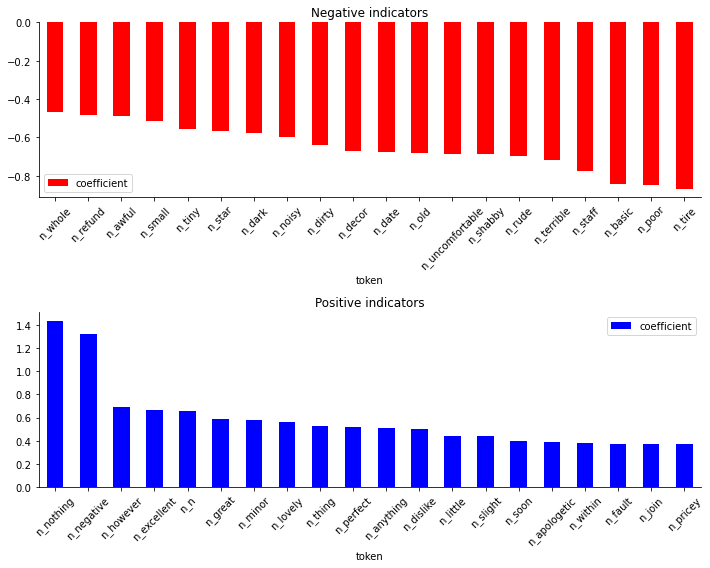

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
prwords = None
def plot_coefs(logreg, words):
    coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "token": words})
    coef_df = coef_df.sort_values("coefficient", ascending=False)
    global prwords
    prwords = coef_df.copy()
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # smallest coefficient -> tokens indicating negative sentiment 
    coef_df.tail(20).set_index("token").plot(kind="bar", rot=45, ax=axs[0], color="red")
    axs[0].set_title("Negative indicators")
 
    
    # largest coefficient -> tokens indicating positive sentiment 
    coef_df.head(20).set_index("token").plot(kind="bar", rot=45, ax=axs[1], color="blue")
    axs[1].set_title("Positive indicators")
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_coefs(logreg, words)

In [185]:
#making a list of most indicative positive words.
listprwords = []
for x in prwords['token'].head(20):
    listprwords.append(x)

It is important to note here that the model is not perfect! It only has close to a 72% accuracy as previously determined.
Now I will use the same train of lostic for the negative reviews.

In [24]:
desired_columns_n = []

for c in train_df.columns:
    if c[0:2] == "n_":
        desired_columns_n.append(c)

print(desired_columns_n[0:20])

['n_', 'n_00', 'n_02', 'n_1', 'n_10', 'n_100', 'n_11', 'n_11am', 'n_11pm', 'n_12', 'n_15', 'n_16', 'n_17', 'n_18', 'n_1st', 'n_2', 'n_20', 'n_200', 'n_21', 'n_24']


It looks the the above code is only extracting the columns which beging with n_!

In [25]:
nr_df = train_df[desired_columns_n].copy()
nr_df.head()

,n_,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
nr_df_test = test_df[desired_columns_n].copy()
nr_df_test.head()

,n_,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
display(pd.DataFrame(nr_df.sum(axis=0)).T)

,n_,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,15116,49,11,163,145,32,50,10,19,56,...,10,15,94,968,21,73,78,20,31,24


In [28]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(nr_df, y_train)

# Training and test score
print(f"Train score: {logreg.score(nr_df, y_train)}")
print(f"Test score: {logreg.score(nr_df_test, y_test)}")

Train score: 0.7742616033755274
Test score: 0.7330677290836654


This time the model is slightly better for negative reviews in the training set, around 73% accurate.

In [29]:
words = nr_df.columns
words

Index(['n_', 'n_00', 'n_02', 'n_1', 'n_10', 'n_100', 'n_11', 'n_11am',
       'n_11pm', 'n_12',
       ...
       'n_world', 'n_worry', 'n_worth', 'n_would', 'n_write', 'n_wrong',
       'n_year', 'n_yes', 'n_yet', 'n_young'],
      dtype='object', length=1343)

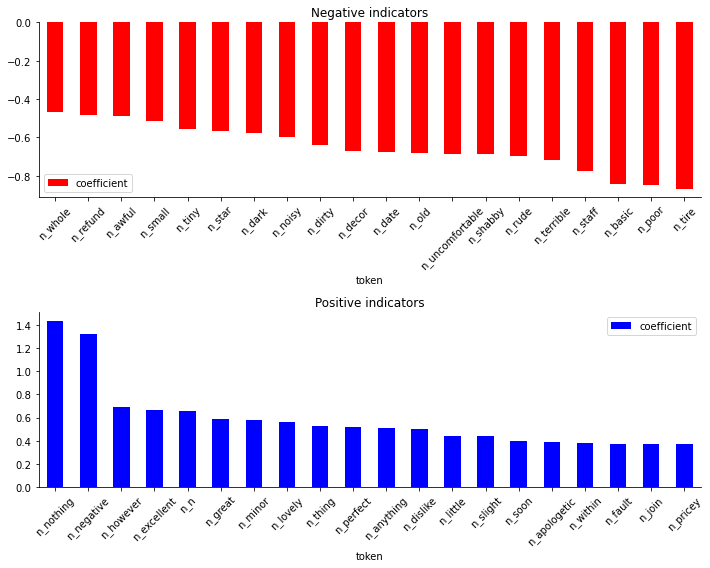

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_coefs(logreg, words):
    coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "token": words})
    coef_df = coef_df.sort_values("coefficient", ascending=False)
    global nrwords
    nrwords = coef_df.copy()
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # smallest coefficient -> tokens indicating negative sentiment 
    coef_df.tail(20).set_index("token").plot(kind="bar", rot=45, ax=axs[0], color="red")
    axs[0].set_title("Negative indicators")
 
    
    # largest coefficient -> tokens indicating positive sentiment 
    coef_df.head(20).set_index("token").plot(kind="bar", rot=45, ax=axs[1], color="blue")
    axs[1].set_title("Positive indicators")
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_coefs(logreg, words)

In [194]:
#making a list of most indicative positive words.
listnrwords = []
for x in nrwords['token'].head(20):
    listnrwords.append(x)

To conclude...

In [189]:
print("The 20 words most indicative of a positive review are:", [x for x in listprwords])

The 20 words most indicative of a positive review are: ['n_nothing', 'n_negative', 'n_however', 'n_excellent', 'n_n', 'n_great', 'n_minor', 'n_lovely', 'n_thing', 'n_perfect', 'n_anything', 'n_dislike', 'n_little', 'n_slight', 'n_soon', 'n_apologetic', 'n_within', 'n_fault', 'n_join', 'n_pricey']


In [195]:
print("The 20 words most indicative of a negative review are:", [x for x in listnrwords])

The 20 words most indicative of a negative review are: ['n_nothing', 'n_negative', 'n_however', 'n_excellent', 'n_n', 'n_great', 'n_minor', 'n_lovely', 'n_thing', 'n_perfect', 'n_anything', 'n_dislike', 'n_little', 'n_slight', 'n_soon', 'n_apologetic', 'n_within', 'n_fault', 'n_join', 'n_pricey']


### Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

I will tranform the scales data using PCA.

In [31]:
# PCA import statement
from sklearn.decomposition import PCA

In [32]:
run_times = []

import timeit

# PCA import statement
from sklearn.decomposition import PCA

for i in range(1,16):
    # Create the PCA object
    my_PCA = PCA(n_components=i)

    # Fit the PCA object to the data
    my_PCA.fit(X_train)

    # Transform the original data. This applies the 'change of basis' that transforms the data to be based on the principal components
    X_PCA = my_PCA.transform(X_train)
    
    start = timeit.default_timer()
    # Fit on the PCA transformed data
    my_logreg_PCA = LogisticRegression()
    
    # Fitting to PCA data
    my_logreg_PCA.fit(X_PCA,y_train)
    
    # Scoring on PCA train and test sets
    stop = timeit.default_timer()
    run_times.append(stop-start)

Time taken for 1 dimensions: 0.013392500000009022
Test Score: 0.6636193155180496
Time taken for 2 dimensions: 0.01851600000009057
Test Score: 0.7302703547429286
Time taken for 3 dimensions: 0.015647599999965678
Test Score: 0.7520706360368807
Time taken for 4 dimensions: 0.014769699999988006
Test Score: 0.749570245350836
Time taken for 5 dimensions: 0.014082799999982853
Test Score: 0.7542584778871698
Time taken for 6 dimensions: 0.0214326999999912
Test Score: 0.7533208313799031
Time taken for 7 dimensions: 0.0169624999999769
Test Score: 0.7540240662603532
Time taken for 8 dimensions: 0.01617169999997259
Test Score: 0.7605094546022816
Time taken for 9 dimensions: 0.02155100000004495
Test Score: 0.7576183778715424
Time taken for 10 dimensions: 0.017037300000083633
Test Score: 0.7595718080950149
Time taken for 11 dimensions: 0.02172649999999976
Test Score: 0.7576183778715424
Time taken for 12 dimensions: 0.02209970000001249
Test Score: 0.7608220034380372
Time taken for 13 dimensions: 0.019

It's difficult to see the trend here ^ so will plot the data.

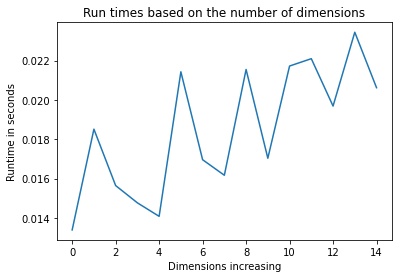

In [199]:
plt.figure()
plt.plot(run_times)
plt.title("Run times based on the number of dimensions")
plt.xlabel("Dimensions increasing")
plt.ylabel("Runtime in seconds")
plt.show()

As we can see based on the chart above, in general, the more dimenstions you have, the higher the runtime. There are many peaks and valleys however. So the very generalizeable trend is as dimensions go up so does runtime.

In [34]:
# Create the PCA object
my_PCA = PCA(n_components=2) #we want 2 principal component vectors returned to us
my_PCA_test = PCA(n_components=2)

# Fit the PCA object to the data
my_PCA.fit(X_train)
my_PCA_test.fit(X_test)

# Transform the original data. This applies the 'change of basis' that transforms the data to be based on the principal components
X_PCA = my_PCA.transform(X_train)
X_PCA_test = my_PCA.transform(X_test)

Out of curiosity I would like to see the components - how the pca object has changed the x values.

In [35]:
my_PCA.components_

array([[ 0.00594233, -0.0273118 ,  0.2152059 , ...,  0.01969997,
         0.01854297,  0.02300334],
       [-0.01587498,  0.04144229, -0.01421672, ..., -0.00211932,
        -0.00242997, -0.00219477]])

In [36]:
my_PCA.transform(my_PCA.components_)

array([[1.00000000e+00, 1.69655956e-15],
       [1.71043735e-15, 1.00000000e+00]])

In [211]:
print(f"The PC1 axis values have variance: {np.var(X_train[:,0]):0.2f}")
print(f"The PC2 axis values have variance: {np.var(X_train[:,1]):0.2f}")

The PC1 axis values have variance: 1.00
The PC2 axis values have variance: 1.00


In [37]:
print(f"The PC1 axis values have variance: {np.var(X_PCA[:,0]):0.2f}")
print(f"The PC2 axis values have variance: {np.var(X_PCA[:,1]):0.2f}")

The PC1 axis values have variance: 20.88
The PC2 axis values have variance: 12.92


It seems like overall the vectors indicate there is a positive correlation between a combination of the linear objects and our target variable. Now that the data is treansformed, we can fit it to a logitstical regression model. What's also interesting is that "Each of our original features had a variance of 1, (neither is more informative than the other by this metric). However after applying the PCA transformation, the new feature, PC1, has a" higher variance than the original features. PC has the greatest information. 

In [38]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='lbfgs')
logit.fit(X_PCA, y_train)
logit.score(X_PCA, y_train)
print("Accuracy score on the test set is:")
logit.score(X_PCA_test, y_test)


Accuracy score on the test set is:


0.7215842512303726

Interestingly, before applying the tranformations the accuract score was Test Score: 0.7328333723927818
. Now it is lower! It is 0.7215842512303726 . Maybe this tranformation did not improve the accuracy in predicting the review.

### List one advantage and one disadvantage of dimensionality reduction

One advantage is that "PCA can also be very useful for visualization" "We can reduce the data dimensionality down to something manageable and then plot the data. Once again, these components will contain information from all the features. Selectively plotting original features only shows us how the two features in question relate to each other.". In my own words I would say you can plot 2D graphs with PCA. the two dimensions are linear combinations of the entire dataset! SO you get information about the entire dataset in two dimenstions. <br>
"One significant weakness of PCA is that it reduces the ease of data interpretability." "So while PCA can benefit us in terms of reduced overfitting and computation time, it does reduce interpretability. In certain scenarios this may be a deal-breaker.". In my own words, you can't tell an executive with PCA that if you increase a variable by x factor, it would lead to y increase/decrease in your target variable/more or less likely to be classified in a certain way. PCA makes our model perform better often, and helps us determine which features to drop. However, it reduces the interpretability.

### Fit a KNN model to this data. What is the accuracy score on the test set?

In [40]:
#Fit default KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

#print(KNN_model.n_neighbours)
print(KNN_model.score(X_test,y_test))
print(KNN_model.score(X_train,y_train))

0.6367471291305367
0.751211126738553


The assumption here is that "this data refers to the training data. It looks like the KNN model score on the test set is 0.6367471291305367. This is way lower than the score for logistic regression!

### KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

In [41]:
samples_df = train_df.copy()

Help for keeping track of time: https://stackoverflow.com/questions/5622976/how-do-you-calculate-program-run-time-in-python

In [213]:
import timeit

run_time = []
for i in [0.1,0.2,0.3,0.4,0.5]:
    samples_df.sample(frac = i, random_state = 1)
    X_train_sample = samples_df.drop(columns = "rating",axis=1)
    y_train_sample = samples_df["rating"]
    start = timeit.default_timer()
    
    KNN_model = KNeighborsClassifier()
    KNN_model.fit(X_train_sample, y_train_sample)
    print("Test score for sample size of", i)
    print(KNN_model.score(X_test,y_test))
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    run_time.append(stop-start)

Test score for sample size of 0.1


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.5760487461917038
Time:  2.3914487000001827
Test score for sample size of 0.2


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.5760487461917038
Time:  2.4419091999989178
Test score for sample size of 0.3


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.5760487461917038
Time:  2.458744299998216
Test score for sample size of 0.4


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.5760487461917038
Time:  2.7567466999971657
Test score for sample size of 0.5


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.5760487461917038
Time:  2.4828703999992285


Now I will plot run time based on the increasing fraction of sample size.

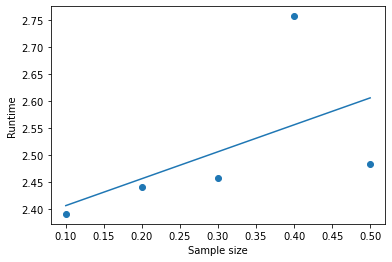

In [214]:
xx = [0.1,0.2,0.3,0.4,0.5]
xx = np.array(xx)
a,b = np.polyfit(xx,run_time,1)
plt.scatter(xx,run_time)
plt.title("Runtime vs Sample size")
plt.xlabel("Sample size")
plt.ylabel("Runtime")
plt.plot(xx, a*xx+b)
plt.show()

There is a general upwards trend. between sample size and runtime! This is because it takes more effort for the computer to parse through more data and fit it to the mode. Help with graph: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

### List one advantage and one disadvantage of reducing the number of observations.

An advantage as proved in the above code is that you can reduce your runtime with less observations. This means that more time is saved. A disadvantage is, especially if you don't sample randomly, that the further models would be biased. It's important to make sure the sample is a good representation of the data as a whole.

### Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

First I will split the dataset into train and validation sets.

In [45]:
#Important to note here that data has already been scaled here
from sklearn.model_selection import train_test_split
# Splitting the remainder in two chunks
X_PCA, X_validation, y_train, y_validation = \
    train_test_split(X_PCA, y_train, test_size = 0.3,
                     random_state=1)

In [46]:
"""from sklearn.model_selection import train_test_split
# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.3,
                     random_state=1)"""

'from sklearn.model_selection import train_test_split\n# Splitting the remainder in two chunks\nX_train, X_validation, y_train, y_validation =     train_test_split(X_train, y_train, test_size = 0.3,\n                     random_state=1)'

Next I will try to find the optimal value for k by iterating over around 40 different k values.

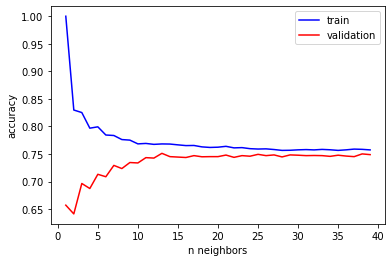

In [47]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 40))
train_scores = []
validation_scores = []

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_PCA, y_train)
    
    # Evaluate
    train_scores.append(knn.score(X_PCA, y_train))
    validation_scores.append(knn.score(X_validation, y_validation))
 
    
plt.figure()
plt.plot(k_values, train_scores, c='blue', label='train')
plt.plot(k_values, validation_scores, c='red', label='validation')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()


It looks like a value between 10 and fifteen makes sure the data isn't too overfit or underfit - right at the elbow of the train and validation plots.

In [48]:
#Trick to calculate the ideal c value: 

# index the value that is largest in the test accuracy
index_of_max = np.argmax(validation_scores)

# the corresponding best c value
best_c = k_values[index_of_max]

best_c

13

The ideal K-value for this data set appears to be 13.

### What is the issue with splitting the data into train and validation sets after performing vectorization?

Basically you could get the data leakage. So we did the vectorization using the entire training data set. Now that our vector is made, it's made on the entire set. Then, when we split into train and validation, we are taking a subset of the overall training set for the validation peice. The data from the overall training set got leaked into the validation data! In general terms, the test data should not be included when you are instantiating and fitting your model. This is why it's best to split first, then apply the vectorizer afterwards. 

### Fit a decision tree model to this data. What is the accuracy score on the test set?

In [59]:
from sklearn import *

In [2]:
#Fit default KNN model
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=5)
DT_model.fit(X_PCA, y_train);

#print(KNN_model.n_neighbours)
print(DT_model.score(X_PCA_test,y_test))
#print(DT_model.score(X_PCA,y_train))

NameError: name 'X_PCA' is not defined

The Decision tree model with a max depth of one performed really poorly on the test set - worse than the KNN model and with Logistic regression, with an accuracy of around 71%

#### Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

First I am splitting the data set into train and validation.¶

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the remainder in two chunks
X_PCA, X_validation, y_train, y_validation = \
    train_test_split(X_PCA, y_train, test_size = 0.3,
                     random_state=1)

I will use the same random state as for the previous code to get comparable results.

In [71]:
from sklearn.model_selection import train_test_split
# Splitting the remainder in two chunks
X_PCA, X_validation, y_train, y_validation = \
    train_test_split(X_PCA, y_train, test_size = 0.3,
                     random_state=1)

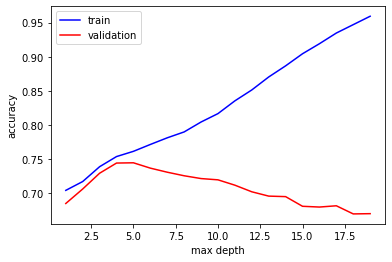

In [75]:
from sklearn.tree import DecisionTreeClassifier

maxdepth_values = list(range(1, 20))
train_scores = [] #keeping track of train scores
validation_scores = []

for i in maxdepth_values:
    
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_PCA, y_train)
    
    # Evaluate
    train_scores.append(dtc.score(X_PCA, y_train))
    validation_scores.append(dtc.score(X_validation, y_validation))
 
    
plt.figure()
plt.plot(maxdepth_values, train_scores, c='blue', label='train')
plt.plot(maxdepth_values, validation_scores, c='red', label='validation')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()


 A max depth of around up to 2.5 or 5 is giving a high accuract without overfitting or underfitting the data. Its the elbow of botht he train and validation lines.

In [76]:
#Trick to calculate the ideal c value: 

# index the value that is largest in the test accuracy
index_of_max = np.argmax(validation_scores)

# the corresponding best c value
best_c = k_values[index_of_max]

best_c

5

The idea maximum depth for the decision tree seems to be 5.

### Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

One advantage of decision trees over KNN is that they are faster. They take less computing time than KNN. Another advantage is that decision trees are more easily explainable than KNN. You can tell people that by which criteria the data decided to classify one way or the other. ON the other hand, KNN is more related to distance between points which has a lot of mathematical explanation behind it. One weakness of classification trees is that even if the data changes in a small way, it would massivelly change the way things are classified especially if you have many branched. Finally another weakness of decision trees are that you have to be very careful when using it with a lot of data. This is because if a tree has too many branches and notes, we can get overfitting. Overfitting will make our model less good at being predictive, as it will not captiure the large underlying trend.

### What is the purpose of the validation set, i.e., how is it different than the test set?

Validation set is a subset of the training set. The validation set helps us to adjust the hyperparameters. The validation set is kind of like a second train set, in that we use it as an unbiased way to see how the model is performing. We can adjust the hyperparameters such as C value in logistical regression, and see how that affects the performance in the validation set. Then, once we have decided on hyperparameters which give us a good accuracy precision etc., we can complete the model. Once it is complete, we can not adjust it anymore and apply it on the test set. This helps avoid overfitting to the testing data. 

#### Re-run a decision tree or logistic regression on the data again: Perform a 5-fold cross validation to optimize the hyperparameters of your model.

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [81]:
### EXPERIMENT 1: 2-fold cross validation ###
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(X_PCA)

cross_validation_scores = []

C_range = np.array([.0001,.001,.1,\
                1,10,100])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1,max_iter = 1000)
    cv_score = np.mean(cross_val_score(LR_model, X_test, y_test, cv = 5)) #cv is 5 so it is 5-fold
    cross_validation_scores.append(cv_score)
which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

The best model has C =  0.001


#### What does your confusion matrix look like for your best model on the test set?

Fitting a logistic regression model with the C value we determined was optimal - 0.001

In [90]:
best_model = LogisticRegression(C=0.001,random_state=1,max_iter = 1000)
best_model.fit(X_PCA,y_train)

LogisticRegression(C=0.001, max_iter=1000, random_state=1)

In [122]:
print(X_test.shape, y_test.shape)

(4267, 2743) (4267,)


In [133]:
best_model.score(X_PCA_test, y_test)

0.7197093977033044

The accuract on the testing set is around 72%! Now I will find out the predicted values for y on the transformed X values and create the confustion matrix.

In [124]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Get class predictions
y_pred = best_model.predict(X_PCA_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

In [125]:
cf_matrix

array([[ 927,  882],
       [ 314, 2144]], dtype=int64)

C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


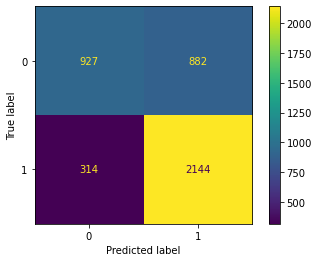

In [128]:
plot_confusion_matrix(best_model, X_PCA_test, y_test);

The data has many true positives, around 2144. Then it has the least false negatives around 314. It is very cautious to not incorrectly label a point as positive (in this case, positive meaning a good review.)

### Create one new feature of your choice: Explain your new feature and why you consider it will improve accuracy.

First let's take a look at the data.

In [100]:
#help with seeing all columns with .head() method: https://datascienceparichay.com/article/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/
pd.set_option("display.max_columns", None)
train_df.head()

Additional_Number_of_Scoring  Average_Score  \
0                           620            9.0   
1                          1258            9.4   
2                           995            8.1   
3                           853            8.4   
4                          1243            8.1   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  0                     1974   
1                                  6                     4204   
2                                  2                     3826   
3                                  7                     2726   
4                                 11                     6608   

   Review_Total_Positive_Word_Counts  \
0                                164   
1                                  4   
2                                 38   
3                                 10   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review        lat  \
0                                           1                562  51.506558   
1                                           5                276  51.502435   
2                                           1                129  51.504348   
3                                          10                164  51.507377   
4                                          69                639  51.513556   

        lng  weekday_of_review  month_of_review  year_of_review  bed_single  \
0 -0.004514                  1                1            2016           0   
1 -0.000250                  0               10            2016           0   
2 -0.033444                  0                3            2017           0   
3  0.038657                  0                2            2017           0   
4 -0.180002                  1               11            2015           0   

   bed_double  bed_queen  bed_king  trip_leisure  trip_biz  group_solo  \
0           0          0         0             1         0           0   
1           0          0         0             1         0           0   
2           0          0         0             1         0           0   
3           0          0         0             1         0           0   
4           0          0         0             0         1           0   

   group_couple  group_family  Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0             1             0                              0              0   
1             0             0                              0              0   
2             1             0                              0              0   
3             1             0                              0              0   
4             0             0                              0              0   

   Hotel_Name_88 Studios  Hotel_Name_Ace Hotel London Shoreditch  \
0                      0                                       0   
1                      0                                       0   
2                      0                                       0   
3                      0                                       0   
4                      0                                       0   

   Hotel_Name_Adria Boutique Hotel  Hotel_Name_Aloft London Excel  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Hotel_Name_Amba Hotel Charing Cross  Hotel_Name_Amba Hotel Marble Arch  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                              

Perhaps we can categorize reviewers into experience and novice, with novice being people who gave their first review.

In [101]:
train_df['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts()

1      4810
2      1980
3      1284
4       851
5       664
       ... 
56        1
87        1
116       1
45        1
173       1
Name: Total_Number_of_Reviews_Reviewer_Has_Given, Length: 82, dtype: int64

In [102]:
train_df['Total_Number_of_Reviews_Reviewer_Has_Given'].sum()

65044

It looks like novice users make up 1/13 of the total number of reviewers. It may not make sense to bing it according to that since I don't have the industry knowledge to determine who is really a novice reviewer. So instead I will find the mean number of reviews per year.

In [103]:
mean_rev_peryear = train_df.groupby('year_of_review')['Total_Number_of_Reviews'].mean().round(2)
mean_rev_peryear

year_of_review
2015    3053.28
2016    3033.97
2017    2979.68
Name: Total_Number_of_Reviews, dtype: float64

I chose mean and these to columns because I didn't want my featured column to be linearly related to the target variable - whethe a review is good or bad. This will prevent collinearity.

In [112]:
train_df['Total_Reviews_per_Year'] = train_df['year_of_review'].map(mean_rev_peryear)

In [116]:
train_df[['year_of_review','Total_Reviews_per_Year','Total_Number_of_Reviews_Reviewer_Has_Given']]

,year_of_review,Total_Reviews_per_Year,Total_Number_of_Reviews_Reviewer_Has_Given
0,2016,3033.97,1
1,2016,3033.97,5
2,2017,2979.68,1
3,2017,2979.68,10
4,2015,3053.28,69
...,...,...,...
12793,2017,2979.68,2
12794,2015,3053.28,16
12795,2015,3053.28,5
12796,2017,2979.68,2


Re-doing cross validation to find the best C value for the logistic regression.

In [117]:

cross_validation_scores = []

C_range = np.array([.0001,.001,.1,\
                1,10,100])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1,max_iter = 1000)
    cv_score = np.mean(cross_val_score(LR_model, X_test, y_test, cv = 5))
    cross_validation_scores.append(cv_score)
which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

The best model has C =  0.001


In [131]:
bestest_model = LogisticRegression(C=0.001,random_state=1,max_iter = 1000)
bestest_model.fit(X_PCA, y_train)

LogisticRegression(C=0.001, max_iter=1000, random_state=1)

In [132]:
bestest_model.score(X_PCA_test, y_test)

0.7197093977033044

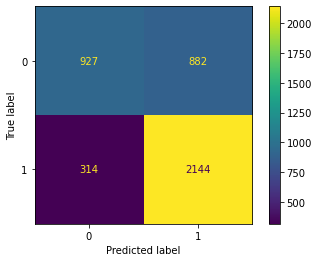

In [221]:
plot_confusion_matrix(bestest_model, X_PCA_test, y_test);

So it looks like the accuracy went from 0.7197093977033044 to 0.7197093977033044 after creating the new feature. he distribution in the confusion matrix isn't all too different either. So my new feature didn't help the model too much.

## Conclusion

- it looks like logistic regression with a 'lbfgs' untransformed by PCA and the decision tree model gave the best accuracy on the test set
- using the regression coefficient we found some words most predictive of a good review like 'nothing' and 'excellent', and some words indicative of a negative review like 'awful'
- In general, there is an upward trend between number of minestions of runtie and logistic regression
- dimensionality reduction can help our model perform better and visualize it along two dimensions, however it does reduce the itnerpratabilitya nd explainability of the model
- K-nearest neighbour classifier gave a lower accuracy than logitstic regression with its optimal k value
- reducing observations made the computer thake less time to run the model. HOwever it could have introduced a bias as well
- Splitting into training and validation after foing vectorization could lead to data leakage, since the vectorization was done on the entire training set without considering the validation subset
- Decision trees are very explainable
- After opimizing hyperaparameter a model performed be